# Support Vector Machines

## 1. Setup

In [4]:
# This project requires Python 3.7 or above
import sys
assert sys.version_info >= (3, 7)

In [5]:
# It also requires Scikit-Learn >= 1.0.1
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [6]:
# Defining the default font sizes to make the figures prettier
import matplotlib.pyplot as plt
# rc = runtime configuration
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [58]:
# Let's create the images/svm folder (if it doesn't already exist), and define the save_fig() function which is used throughout this notebook to save the figures in high-res
from pathlib import Path
images_path = Path() / "images" / "svm"
images_path.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = images_path / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 2. Linear SVM Classification

In [16]:
# Generating and saving some figures
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

In [18]:
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [23]:
#SVM Classifier Model
svm_clf = SVC(kernel='linear', C=float(100000))
svm_clf.fit(X,y)

SVC(C=100000.0, kernel='linear')

In [27]:
#Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [36]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # At the decision boundary, w0x0 + w1x1 + b = 0
    # => x1 = -w0x0/w1 -b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -(w[0]/w[1])*x0 -b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    
    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:,0], svs[:,1], s=180, facecolors='#AAA', zorder=-1)

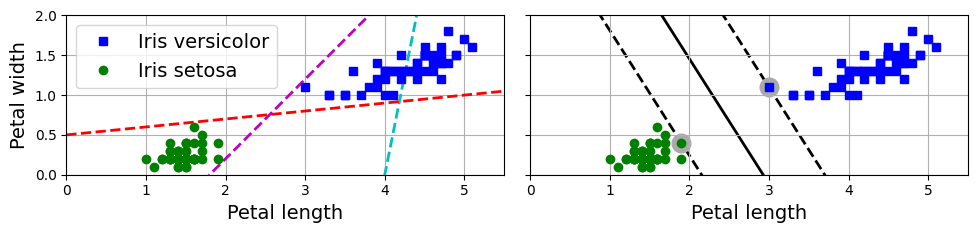

In [67]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "c--", linewidth=2)
plt.plot(x0, pred_2, "m--", linewidth=2)
plt.plot(x0, pred_3, "r--", linewidth=2)
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:,0][y==0], X[:,1][y==0], "go", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs")
plt.plot(X[:,0][y==0], X[:,1][y==0], "go")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()